In [2]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt 
import sys
import torch
import torch.optim as optim
import torch.nn as nn
from dip import EncDec
from utils import imread

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, UpSampling1D, Conv2DTranspose, MaxPool1D, Dropout, Conv1D, Conv2D, Conv3D, Flatten, MaxPool2D, AveragePooling2D, BatchNormalization

In [3]:
im = imread('../data/denoising/lena.png')
noise1 = imread('../data/denoising/lena-noisy.png')
error1 = ((im - noise1)**2).sum()
print ('Noisy image SE: {:.2f}'.format(error1))

Noisy image SE: 338.54


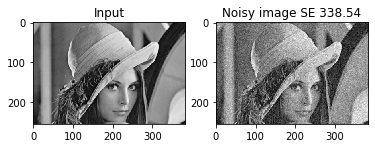

In [4]:
plt.figure(1)

plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title('Input')

plt.subplot(122)
plt.imshow(noise1, cmap='gray')
plt.title('Noisy image SE {:.2f}'.format(error1))

plt.show(block=False)

In [9]:
class EncDec(nn.Module):
    def __init__(self):
        super(EncDec, self).__init__()
        self.bn16 = nn.BatchNorm2d(16)
        self.bn32 = nn.BatchNorm2d(32)
        self.bn64 = nn.BatchNorm2d(64)
        self.bn128 = nn.BatchNorm2d(128)
        self.bn256 = nn.BatchNorm2d(256)
        
        self.conv1 = nn.Conv2d(1, 16, 3, 2, 1) # Encoder - 1
        self.conv2 = nn.Conv2d(16, 32, 3, 2, 1) # Encoder - 2
        self.conv3 = nn.Conv2d(32, 64, 3, 2, 1) # Encoder - 3 
        #self.conv4 = nn.Conv2d(64, 128, 3, 2, 1) # Encoder - 4
        #self.conv5 = nn.Conv2d(128, 256, 3, 2, 1) # Encoder - 5
        
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear') #, align_corners=True
        
        #self.conv5_t = nn.Conv2d(256, 256, 3, 1, 1) # Decoder - 5
        #self.conv4_t = nn.Conv2d(256, 128, 3, 1, 1) # Decoder - 4
        self.conv3_t = nn.Conv2d(64, 64, 3, 1, 1) # Decoder - 3
        self.conv2_t = nn.Conv2d(64, 32, 3, 1, 1) # Decoder - 2
        self.conv1_t = nn.Conv2d(32, 16, 3, 1, 1) # Decoder - 1
        self.conv0_t = nn.Conv2d(16, 1, 3, 1, 1) # Final Decoder
        
    def forward(self, x):
        out = self.bn16(F.relu(self.conv1(x)))
        out = self.bn32(F.relu(self.conv2(out)))
        out = self.bn64(F.relu(self.conv3(out)))
        #out = self.bn128(F.relu(self.conv4(out)))
        #out = self.bn256(F.relu(self.conv5(out)))
        #out = self.upsample(self.bn256(F.relu(self.conv5_t(out))))
        #out = self.upsample(self.bn128(F.relu(self.conv4_t(out))))
        out = self.upsample(self.bn64(F.relu(self.conv3_t(out))))
        out = self.upsample(self.bn32(F.relu(self.conv2_t(out))))
        out = self.upsample(self.bn16(F.relu(self.conv1_t(out))))
        out = torch.tanh(self.conv0_t(out))
        return out

In [ ]:
def get_run_accuracy(MAX_EPOCHS=MAX_EPOCHS):
    

In [ ]:
# With Cross Validation 

In [ ]:
MAX_EPOCHS = 500

net = EncDec()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
noisy_img = torch.FloatTensor(noise1).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)
eta = torch.randn(*noisy_img.size())

for itr in range(MAX_EPOCHS+1):
    out = net(eta)

    # zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward + Backward + Optimize 
    loss = criterion(out, clean_img)
    loss.backward()
    optimizer.step()
    if itr % 100 == 0:
        out_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
        curr_error = ((im - out_img)**2).sum()
        print ("Loss = {}, Error = {}".format(loss.detach().numpy().reshape(-1)[0], curr_error))

Loss = 0.5295026302337646, Error = 52052.22709300822
Loss = 0.0019635907374322414, Error = 193.02882000112004
Loss = 0.0011733577121049166, Error = 115.34575234266191
Loss = 0.00098977901507169, Error = 97.2992413868894


In [13]:
MAX_EPOCHS = 500

net = EncDec()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
noisy_img = torch.FloatTensor(noise1).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)
eta = torch.randn(*noisy_img.size())

for itr in range(MAX_EPOCHS+1):
    out = net(eta)

    # zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward + Backward + Optimize 
    loss = criterion(out, clean_img)
    loss.backward()
    optimizer.step()
    if itr % 100 == 0:
        out_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
        curr_error = ((im - out_img)**2).sum()
        print ("Loss = {}, Error = {}".format(loss.detach().numpy().reshape(-1)[0], curr_error))

Loss = 0.4135088622570038, Error = 40649.57433548552
Loss = 0.003708452917635441, Error = 364.5557483538681
Loss = 0.0024473126977682114, Error = 240.58061929770076
Loss = 0.0018418814288452268, Error = 181.06430733316517
Loss = 0.0015366722363978624, Error = 151.06102744282433
Loss = 0.0014409960713237524, Error = 141.65567761924345


In [12]:
out_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
curr_error = ((im - out_img)**2).sum()
print ("Loss = {}, Error = {}".format(loss.detach().numpy().reshape(-1)[0], curr_error))

Loss = 0.002824086230248213, Error = 277.61898107372826


In [8]:
MAX_EPOCHS = 500

net = EncDec()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
noisy_img = torch.FloatTensor(noise1).unsqueeze(0).unsqueeze(0).transpose(2, 3)
clean_img = torch.FloatTensor(im).unsqueeze(0).unsqueeze(0).transpose(2,3)
eta = torch.randn(*noisy_img.size())

for itr in range(MAX_EPOCHS):
    out = net(eta)

    # zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward + Backward + Optimize 
    loss = criterion(out, clean_img)
    loss.backward()
    optimizer.step()
    if itr % 100 == 0:
        out_img = out[0, 0, :, :].transpose(0,1).detach().numpy()
        curr_error = ((im - out_img)**2).sum()
        print ("Loss = {}, Error = {}".format(loss.detach().numpy().reshape(-1)[0], curr_error))

Loss = 0.6149212718009949, Error = 60449.218058798535
Loss = 0.004708273336291313, Error = 462.8420996386383
Loss = 0.003202194580808282, Error = 314.78853489323456
Loss = 0.001910297549329698, Error = 187.7898935682913
Loss = 0.0015068281209096313, Error = 148.12723434064122
